In [1]:
ig_id = "sasika"

In [2]:
google_colab = False

if google_colab:
  # download dataset
  !gdown --id 1YHwpeq4l39udvxVewWyRwmlm9J_JIm7k

In [3]:
# prompt: unzip "sasika.zip" using python 
import zipfile

with zipfile.ZipFile(f"{ig_id}.zip", 'r') as zip_ref:
    zip_ref.extractall("")

## Load images

In [4]:
# get the file path using the pathlib relative to the file name
from pathlib import Path

# get the file path
file_path = Path(ig_id)
file_path

# prompt: read the images in the folder and store them in a list
import os

# get the list of files in the folder
files = os.listdir(file_path)

# get the list of images
images = [f for f in files if f.endswith('.jpg')]




In [69]:
main_dir = Path(r"D:\New folder\sasika")

In [70]:
# get files in the main_dir 
files = os.listdir(main_dir)
files

['image_0.jpg',
 'image_1.jpg',
 'image_10.jpg',
 'image_100.jpg',
 'image_101.jpg',
 'image_102.jpg',
 'image_103.jpg',
 'image_104.jpg',
 'image_105.jpg',
 'image_106.jpg',
 'image_107.jpg',
 'image_108.jpg',
 'image_109.jpg',
 'image_11.jpg',
 'image_110.jpg',
 'image_111.jpg',
 'image_112.jpg',
 'image_113.jpg',
 'image_114.jpg',
 'image_115.jpg',
 'image_116.jpg',
 'image_117.jpg',
 'image_118.jpg',
 'image_119.jpg',
 'image_12.jpg',
 'image_120.jpg',
 'image_121.jpg',
 'image_122.jpg',
 'image_123.jpg',
 'image_124.jpg',
 'image_125.jpg',
 'image_126.jpg',
 'image_127.jpg',
 'image_128.jpg',
 'image_129.jpg',
 'image_13.jpg',
 'image_130.jpg',
 'image_131.jpg',
 'image_132.jpg',
 'image_133.jpg',
 'image_134.jpg',
 'image_135.jpg',
 'image_136.jpg',
 'image_137.jpg',
 'image_138.jpg',
 'image_139.jpg',
 'image_14.jpg',
 'image_140.jpg',
 'image_141.jpg',
 'image_142.jpg',
 'image_143.jpg',
 'image_144.jpg',
 'image_145.jpg',
 'image_146.jpg',
 'image_147.jpg',
 'image_148.jpg',
 

In [7]:
file_path

WindowsPath('sasika')

In [71]:
images

['image_0.jpg',
 'image_1.jpg',
 'image_10.jpg',
 'image_100.jpg',
 'image_101.jpg',
 'image_102.jpg',
 'image_103.jpg',
 'image_104.jpg',
 'image_105.jpg',
 'image_106.jpg',
 'image_107.jpg',
 'image_108.jpg',
 'image_109.jpg',
 'image_11.jpg',
 'image_110.jpg',
 'image_111.jpg',
 'image_112.jpg',
 'image_113.jpg',
 'image_114.jpg',
 'image_115.jpg',
 'image_116.jpg',
 'image_117.jpg',
 'image_118.jpg',
 'image_119.jpg',
 'image_12.jpg',
 'image_120.jpg',
 'image_121.jpg',
 'image_122.jpg',
 'image_123.jpg',
 'image_124.jpg',
 'image_125.jpg',
 'image_126.jpg',
 'image_127.jpg',
 'image_128.jpg',
 'image_129.jpg',
 'image_13.jpg',
 'image_130.jpg',
 'image_131.jpg',
 'image_132.jpg',
 'image_133.jpg',
 'image_134.jpg',
 'image_135.jpg',
 'image_136.jpg',
 'image_137.jpg',
 'image_138.jpg',
 'image_139.jpg',
 'image_14.jpg',
 'image_140.jpg',
 'image_141.jpg',
 'image_142.jpg',
 'image_143.jpg',
 'image_144.jpg',
 'image_145.jpg',
 'image_146.jpg',
 'image_147.jpg',
 'image_148.jpg',
 

In [9]:
# load images using
import os
from pathlib import Path
images_dir = f"{ig_id}"
image_file_names = os.listdir(images_dir)

# sort images by name
image_file_names = sorted(image_file_names)

In [79]:

image_file_paths = [os.path.join(main_dir, image_file_name) for image_file_name in image_file_names]

image_file_paths[:5]

['D:\\New folder\\sasika\\image_0.jpg',
 'D:\\New folder\\sasika\\image_1.jpg',
 'D:\\New folder\\sasika\\image_10.jpg',
 'D:\\New folder\\sasika\\image_100.jpg',
 'D:\\New folder\\sasika\\image_101.jpg']

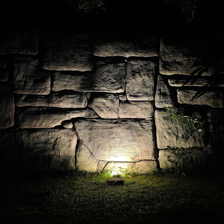

In [73]:
# show one image
from PIL import Image

image = Image.open(image_file_paths[0])

# reduce image size to 224x224 px
image = image.resize((224, 224))
image

In [12]:
# convert image to numpy array
import numpy as np

image_array = np.array(image)
image_array.shape

(224, 224, 3)

In [15]:
np.append(np.array([]), "a").shape

(1,)

## Extract Color pallete

In [119]:
import cv2
import numpy as np

def create_bar(height, width, color):
        bar = np.zeros((height, width, 3), np.uint8)
        bar[:] = color
        red, green, blue = int(color[2]), int(color[1]), int(color[0])
        return bar, (red, green, blue)

def feature_extractor(image_file_path, number_clusters=3):

    img = cv2.imread(image_file_path)
    img = cv2.resize(img, (224, 224))
    height, width, _ = np.shape(img)

    data = np.reshape(img, (height * width, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness, labels, centers = cv2.kmeans(data, number_clusters, None, criteria, 10, flags)

    rgb_values = []

    for index, row in enumerate(centers):
        rgb_values.append(row)

    rgb_values = np.array(rgb_values)
    
    rgb_values = rgb_values.flatten()    
    return rgb_values

ans = feature_extractor(r"D:\New folder\sasika\image_0.jpg",1)

In [120]:
ans

array([ 65.7724   ,  83.48384  ,  89.98855  ,   6.6070757,   9.12663  ,
         9.297209 , 147.50775  , 173.535    , 188.5776   ], dtype=float32)

In [118]:
ans.flatten().shape

(9,)

In [74]:
import cv2
import numpy as np


def create_bar(height, width, color):
    bar = np.zeros((height, width, 3), np.uint8)
    bar[:] = color
    red, green, blue = int(color[2]), int(color[1]), int(color[0])
    return bar, (red, green, blue)

img = cv2.imread(image_file_paths[0])
height, width, _ = np.shape(img)
# print(height, width)

data = np.reshape(img, (height * width, 3))
data = np.float32(data)

number_clusters = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(data, number_clusters, None, criteria, 10, flags)
# print(centers)

font = cv2.FONT_HERSHEY_SIMPLEX
bars = []
rgb_values = []

for index, row in enumerate(centers):
    bar, rgb = create_bar(200, 200, row)
    bars.append(bar)
    rgb_values.append(rgb)

img_bar = np.hstack(bars)

for index, row in enumerate(rgb_values):
    image = cv2.putText(img_bar, f'{index + 1}. RGB: {row}', (5 + 200 * index, 200 - 10),
                        font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
    print(f'{index + 1}. RGB{row}')

KeyboardInterrupt: 

In [18]:
rgb_values = np.array(rgb_values)
rgb_values

array([[  5,   5,   3],
       [165, 151, 126],
       [223, 209, 183],
       [105,  97,  77],
       [ 48,  46,  34]])

In [87]:
rgb_values = feature_extractor(image_file_paths[0],5)
rgb_values

[array([124.184654, 149.29822 , 164.2133  ], dtype=float32),
 array([ 76.32384 ,  95.84122 , 103.753136], dtype=float32),
 array([33.60344 , 45.02783 , 47.378643], dtype=float32),
 array([177.86386, 204.97017, 219.64958], dtype=float32),
 array([4.151834 , 5.7877607, 5.791198 ], dtype=float32)]

In [20]:
rgb_values.shape

(15,)

In [21]:
# prompt: convert "img_bar" to RGB format

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bar = cv2.cvtColor(img_bar, cv2.COLOR_BGR2RGB)


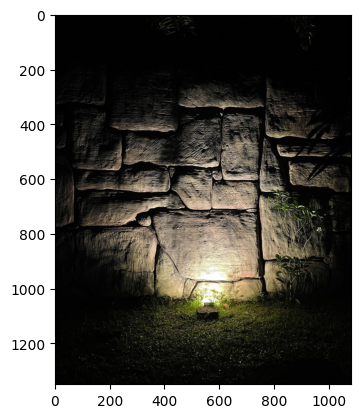

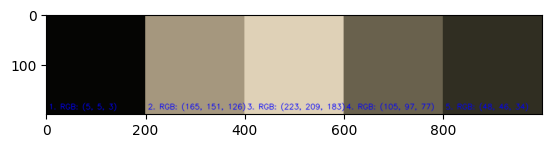

In [22]:
# prompt: show image np array

import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()
plt.imshow(img_bar)
plt.show()


In [23]:
img_bar

array([[[ 5,  5,  3],
        [ 5,  5,  3],
        [ 5,  5,  3],
        ...,
        [48, 46, 34],
        [48, 46, 34],
        [48, 46, 34]],

       [[ 5,  5,  3],
        [ 5,  5,  3],
        [ 5,  5,  3],
        ...,
        [48, 46, 34],
        [48, 46, 34],
        [48, 46, 34]],

       [[ 5,  5,  3],
        [ 5,  5,  3],
        [ 5,  5,  3],
        ...,
        [48, 46, 34],
        [48, 46, 34],
        [48, 46, 34]],

       ...,

       [[ 5,  5,  3],
        [ 5,  5,  3],
        [ 5,  5,  3],
        ...,
        [48, 46, 34],
        [48, 46, 34],
        [48, 46, 34]],

       [[ 5,  5,  3],
        [ 5,  5,  3],
        [ 5,  5,  3],
        ...,
        [48, 46, 34],
        [48, 46, 34],
        [48, 46, 34]],

       [[ 5,  5,  3],
        [ 5,  5,  3],
        [ 5,  5,  3],
        ...,
        [48, 46, 34],
        [48, 46, 34],
        [48, 46, 34]]], dtype=uint8)

In [24]:
type(img)

numpy.ndarray

In [25]:
img.shape

(1350, 1080, 3)

In [26]:
# prompt: convert tensor to numpy

features_array = rgb_values
features_array.shape


(15,)

In [80]:
image_file_paths

['D:\\New folder\\sasika\\image_0.jpg',
 'D:\\New folder\\sasika\\image_1.jpg',
 'D:\\New folder\\sasika\\image_10.jpg',
 'D:\\New folder\\sasika\\image_100.jpg',
 'D:\\New folder\\sasika\\image_101.jpg',
 'D:\\New folder\\sasika\\image_102.jpg',
 'D:\\New folder\\sasika\\image_103.jpg',
 'D:\\New folder\\sasika\\image_104.jpg',
 'D:\\New folder\\sasika\\image_105.jpg',
 'D:\\New folder\\sasika\\image_106.jpg',
 'D:\\New folder\\sasika\\image_107.jpg',
 'D:\\New folder\\sasika\\image_108.jpg',
 'D:\\New folder\\sasika\\image_109.jpg',
 'D:\\New folder\\sasika\\image_11.jpg',
 'D:\\New folder\\sasika\\image_110.jpg',
 'D:\\New folder\\sasika\\image_111.jpg',
 'D:\\New folder\\sasika\\image_112.jpg',
 'D:\\New folder\\sasika\\image_113.jpg',
 'D:\\New folder\\sasika\\image_114.jpg',
 'D:\\New folder\\sasika\\image_115.jpg',
 'D:\\New folder\\sasika\\image_116.jpg',
 'D:\\New folder\\sasika\\image_117.jpg',
 'D:\\New folder\\sasika\\image_118.jpg',
 'D:\\New folder\\sasika\\image_119.jpg'

In [159]:
features = []

for i,image_path in enumerate(image_file_paths):
  features.append(feature_extractor(image_path,number_clusters=1))
  print(image_path)
  if i % 10 == 0:
    print(i, "done")

D:\New folder\sasika\image_0.jpg
0 done
D:\New folder\sasika\image_1.jpg
D:\New folder\sasika\image_10.jpg
D:\New folder\sasika\image_100.jpg
D:\New folder\sasika\image_101.jpg
D:\New folder\sasika\image_102.jpg
D:\New folder\sasika\image_103.jpg
D:\New folder\sasika\image_104.jpg
D:\New folder\sasika\image_105.jpg
D:\New folder\sasika\image_106.jpg
D:\New folder\sasika\image_107.jpg
10 done
D:\New folder\sasika\image_108.jpg
D:\New folder\sasika\image_109.jpg
D:\New folder\sasika\image_11.jpg
D:\New folder\sasika\image_110.jpg
D:\New folder\sasika\image_111.jpg
D:\New folder\sasika\image_112.jpg
D:\New folder\sasika\image_113.jpg
D:\New folder\sasika\image_114.jpg
D:\New folder\sasika\image_115.jpg
D:\New folder\sasika\image_116.jpg
20 done
D:\New folder\sasika\image_117.jpg
D:\New folder\sasika\image_118.jpg
D:\New folder\sasika\image_119.jpg
D:\New folder\sasika\image_12.jpg
D:\New folder\sasika\image_120.jpg
D:\New folder\sasika\image_121.jpg
D:\New folder\sasika\image_122.jpg
D:\N

In [160]:
features = np.array(features)

In [161]:
features[0]

array([31.734734, 39.22417 , 42.06001 ], dtype=float32)

In [162]:
features.shape

(186, 3)

# Pipleline for generating features

In [100]:
from sklearn.decomposition import PCA
from scipy.spatial import distance
import random
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


In [125]:
pca = PCA(n_components=6)
pca.fit(features)

PCA(n_components=6)

In [126]:
pca_features = pca.transform(features)

In [127]:
# 186 rows represent images, one image is represented by 180 features
pca_features.shape

(186, 6)

____

In [128]:
# prompt: resize image to 224x224

from PIL import Image

def resize_image(image_path, output_size=(224, 224)):
  image = Image.open(image_path)
  resized_image = image.resize(output_size)
  return resized_image


In [129]:
# prompt: load image as a np array

def load_image_array(image_path,output_size = (224,224)):
  image = Image.open(image_path)

  image = image.resize(output_size)
  image_array = np.array(image)
  return image_array


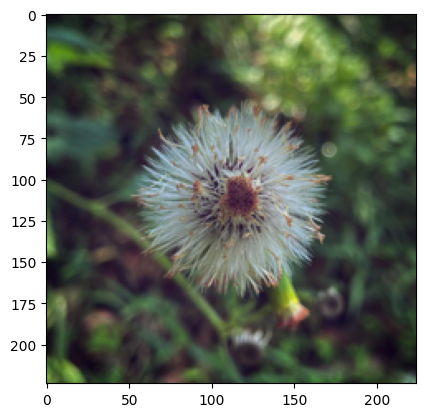

In [163]:
import random

# grab a random query image
# query_image_idx = int(len(image_file_paths) * random.random())
query_image_idx = 68

# let's display the image
img = load_image_array(image_file_paths[query_image_idx])
plt.imshow(img)

In [164]:
pca_features = features

In [132]:
query_image_idx

68

In [134]:
features[query_image_idx]

array([ 72.01216 , 104.399666,  88.33214 , 150.7457  , 165.36957 ,
       153.68896 ,  47.096706,  50.546795,  47.8989  ], dtype=float32)

In [135]:
pca_features

array([[  6.272528,   8.694004,   8.83986 , ...,  62.559895,  79.6508  ,
         85.725266],
       [121.683784, 128.64702 , 128.52823 , ...,  53.573257,  58.85556 ,
         59.20429 ],
       [141.12099 , 128.9499  ,  97.1241  , ..., 211.69525 , 200.26784 ,
        181.42838 ],
       ...,
       [192.70384 , 210.51158 , 220.39128 , ..., 102.88995 , 118.1472  ,
        129.28697 ],
       [145.33836 , 133.67375 , 123.72534 , ..., 218.16248 , 206.5428  ,
        180.51492 ],
       [ 74.70164 ,  84.29936 ,  84.382835, ...,  89.934525, 166.07872 ,
        178.33365 ]], dtype=float32)

Two similar images have similar content, resulting less cosine distance

In [165]:
# cosine distance to every other image with respective to query image
similar_idx = [distance.cosine(features[query_image_idx], feat) for feat in pca_features]

In [166]:
# gives a list and sorts the indices of the image features according to the cosine similarity
# Here starting index is 1 not 0, because when compared the query image with itself will return 0 resulting the minimum value
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

In [167]:
idx_closest

[70, 64, 143, 147, 63]

In [168]:
similar_idx[154]

0.0020806193351745605

____

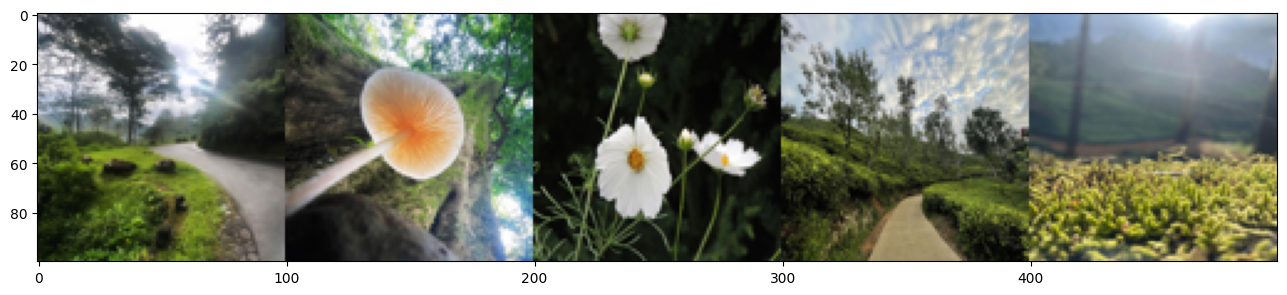

In [169]:
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest:
    img = load_image_array(image_file_paths[idx], output_size=(100, 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize=(16, 12))
plt.imshow(concat_image)
plt.show()

In [141]:
images = image_file_paths

In [170]:


def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
      img = load_image_array(image_file_paths[idx], output_size=(100, 100))
      thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image


Text(0.5, 1.0, 'result images')

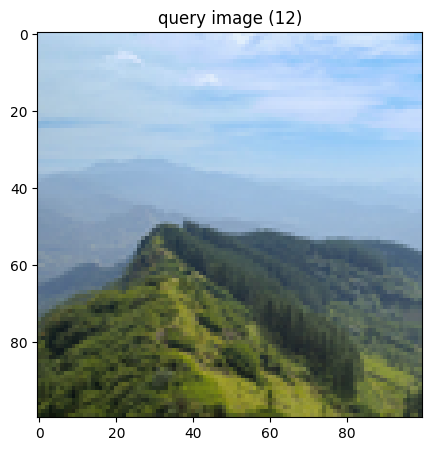

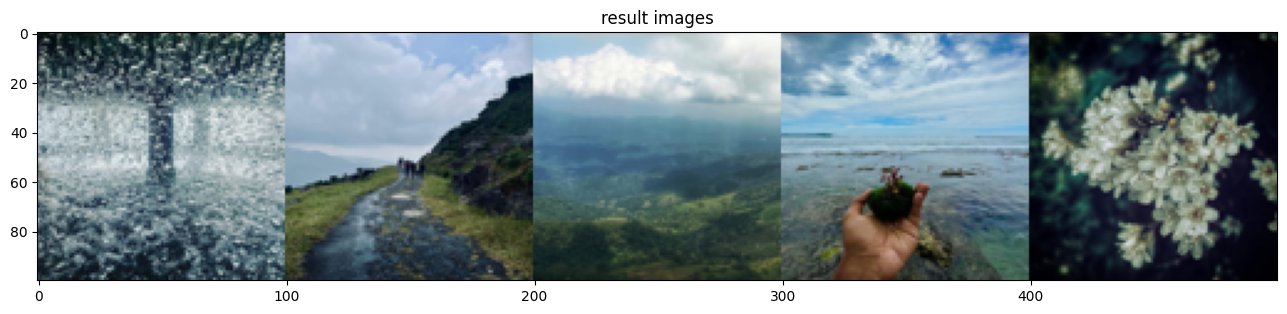

In [171]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ig_id

'sasika'

In [145]:
# save as a pickel file
import pickle

pickle.dump([image_file_paths, pca_features, pca], open(f'{ig_id}_color_3_ig.p', 'wb'))

feature extraction is done from here
____


## Image t-SNE

In [ ]:
!git clone https://github.com/Quasimondo/RasterFairy

Cloning into 'RasterFairy'...


In [ ]:
!pip install "D:\New folder\RasterFairy"

Processing d:\new folder\rasterfairy
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rasterfairy: filename=rasterfairy-1.0.4-py3-none-any.whl size=19716 sha256=3948da3f2c46d92425cb5247c70ab6f6f747128c260966959b5ff5765c815ac8
  Stored in directory: D:\System\TEMP\pip-ephem-wheel-cache-7hp2riuz\wheels\9b\fa\d1\056abcf7d55b6a0d1e97799a2eed9d10a723dae76abd6a6fa1
Successfully built rasterfairy
  Attempting uninstall: rasterfairy
    Found existing installation: rasterfairy 1.0.3
    Uninstalling rasterfairy-1.0.3:
      Successfully uninstalled rasterfairy-1.0.3


In [ ]:
ig_id = "sasika"

In [148]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

In [ ]:
# prompt: download with gdown "https://drive.google.com/file/d/10acua5PB1PX9jnnSjFSyFBdTCmGXbteA/view?usp=sharing"

!gdown 10acua5PB1PX9jnnSjFSyFBdTCmGXbteA

Traceback (most recent call last):
  File "D:\Users\Sasika\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\Users\Sasika\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "D:\Users\Sasika\AppData\Local\Programs\Python\Python310\Scripts\gdown.exe\__main__.py", line 7, in <module>
  File "D:\Users\Sasika\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\cli.py", line 156, in main
    filename = download(
  File "D:\Users\Sasika\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\download.py", line 259, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'


In [ ]:
# download using python "https://drive.google.com/file/d/10acua5PB1PX9jnnSjFSyFBdTCmGXbteA/view?usp=sharing" without using gdown 
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)
    
def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None
  
def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                
download_file_from_google_drive("10acua5PB1PX9jnnSjFSyFBdTCmGXbteA", f"{ig_id}_color_ig.p")


In [ ]:
# prompt: download using gdwon "https://drive.google.com/file/d/193sQEFVch5BP8WTNDMuqei3SS6Bg3xLs/view?usp=sharing"

!gdown --id 193sQEFVch5BP8WTNDMuqei3SS6Bg3xLs


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=193sQEFVch5BP8WTNDMuqei3SS6Bg3xLs
To: /content/sasika_color_ig.p
100% 23.0k/23.0k [00:00<00:00, 59.5MB/s]


In [ ]:
import pickle
ig_id = "sasika"
image_file_paths, pca_features, pca = pickle.load(open(f"{ig_id}_color_ig.p", 'rb'))

for img, f in list(zip(image_file_paths, pca_features))[0:5]:
    print("image: %s, features: %0.2f,%0.2f,%0.2f,%0.2f... "%(img, f[0], f[1], f[2], f[3]))

image: /content/sasika/image_0.jpg, features: 0.91,19.16,47.57,7.43... 
image: /content/sasika/image_1.jpg, features: -34.54,-20.55,-3.33,-7.39... 
image: /content/sasika/image_10.jpg, features: -29.86,-4.65,19.72,6.45... 
image: /content/sasika/image_100.jpg, features: 7.33,23.04,-27.40,-0.18... 
image: /content/sasika/image_101.jpg, features: 2.04,-10.98,2.92,-4.18... 


d:\Users\Sasika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.2.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
images = image_file_paths

In [173]:
num_images_to_plot = 186

if len(images) > num_images_to_plot:
    sort_order = sorted(random.sample(range(len(images)), num_images_to_plot))
    images = [images[i] for i in sort_order]
    pca_features = [pca_features[i] for i in sort_order]

In [174]:
X = np.array(pca_features)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 186 samples in 0.001s...
[t-SNE] Computed neighbors for 186 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 186 / 186
[t-SNE] Mean sigma: 20.142168
[t-SNE] Computed conditional probabilities in 0.011s
[t-SNE] Iteration 50: error = 54.5305824, gradient norm = 0.3733566 (50 iterations in 0.078s)
[t-SNE] Iteration 100: error = 53.2897491, gradient norm = 0.3474616 (50 iterations in 0.070s)
[t-SNE] Iteration 150: error = 53.4818497, gradient norm = 0.3332484 (50 iterations in 0.094s)
[t-SNE] Iteration 200: error = 55.7239227, gradient norm = 0.3119155 (50 iterations in 0.089s)
[t-SNE] Iteration 250: error = 53.3202820, gradient norm = 0.3871365 (50 iterations in 0.125s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.320282
[t-SNE] Iteration 300: error = 0.2143158, gradient norm = 0.0014970 (50 iterations in 0.111s)
[t-SNE] Iteration 350: error = 0.2111367, gradient norm = 0.0023522 

In [175]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

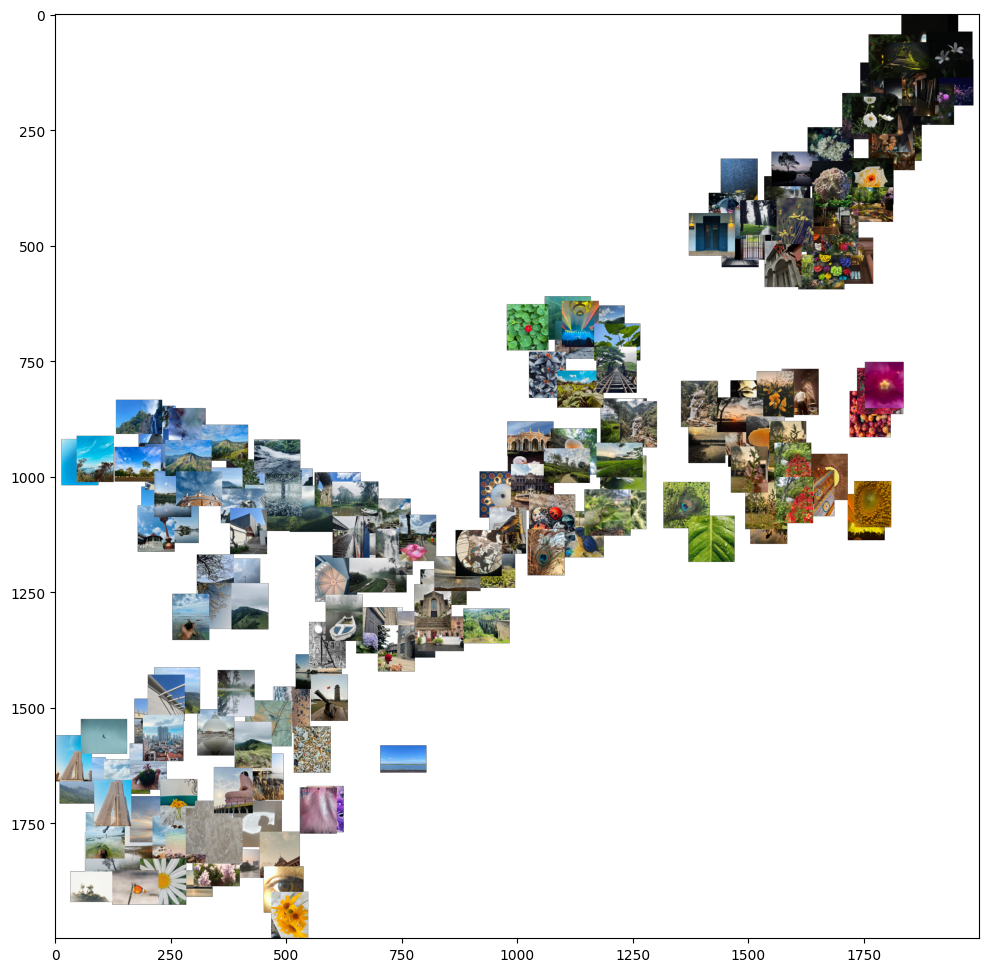

In [182]:
width = 2000
height = 2000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)) )
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

### not overlapping

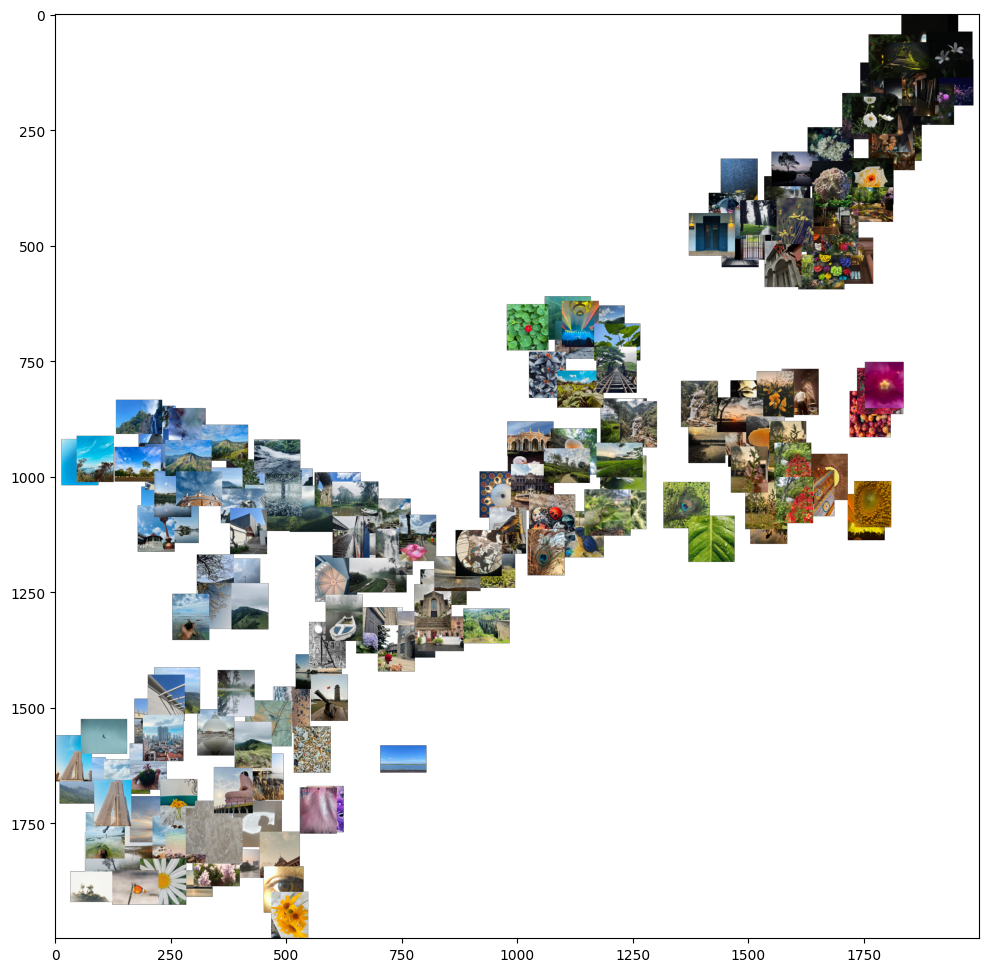

In [179]:
from PIL import Image
import matplotlib.pyplot as plt

width = 2000
height = 2000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
positions = set()  # Set to store positions of already placed tiles

for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)))

    # Calculate the position of the tile without overlapping
    new_x = int((width - max_dim) * x)
    new_y = int((height - max_dim) * y)

    # Ensure that the new position doesn't overlap with existing tiles
    while (new_x, new_y) in positions:
        new_x += max_dim  # Increment x position to move to the next non-overlapping position

    full_image.paste(tile, (new_x, new_y), mask=tile.convert('RGBA'))
    positions.add((new_x, new_y))

plt.figure(figsize=(16, 12))
plt.imshow(full_image)
plt.show()


### Background color 

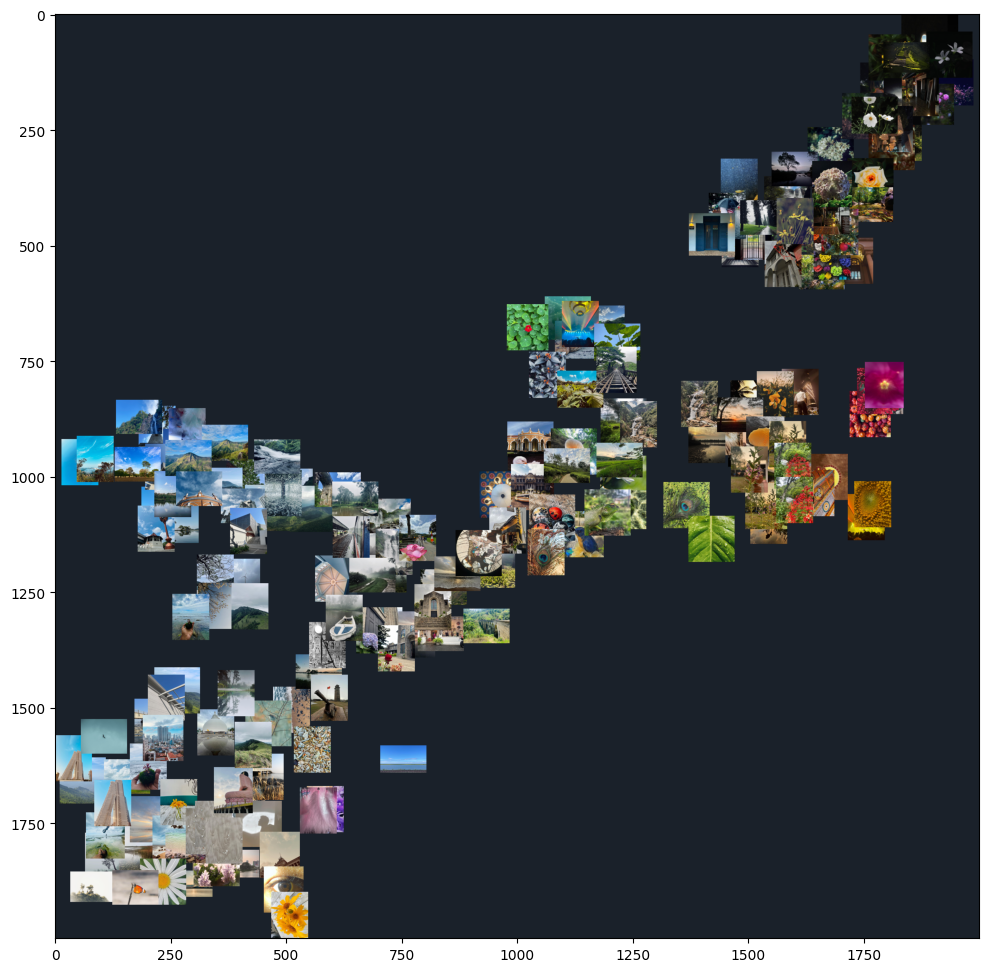

In [187]:
from PIL import Image
import matplotlib.pyplot as plt

width = 2000
height = 2000
max_dim = 100

# Change the background color to #1A212A
background_color = (26, 33, 42)  # RGB values of #1A212A
full_image = Image.new('RGBA', (width, height), background_color)

for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)))
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize=(16, 12))
plt.imshow(full_image)
plt.show()


In [188]:
full_image.save(f"{ig_id}_color_1_t_sne_2000x_bg_color.png")

____

In [190]:
import rasterfairy

# nx * ny = 1000, the number of images
nx = 14
ny = 14

# assign to grid
grid_assignment = rasterfairy.transformPointCloud2D(tsne, target=(nx, ny))

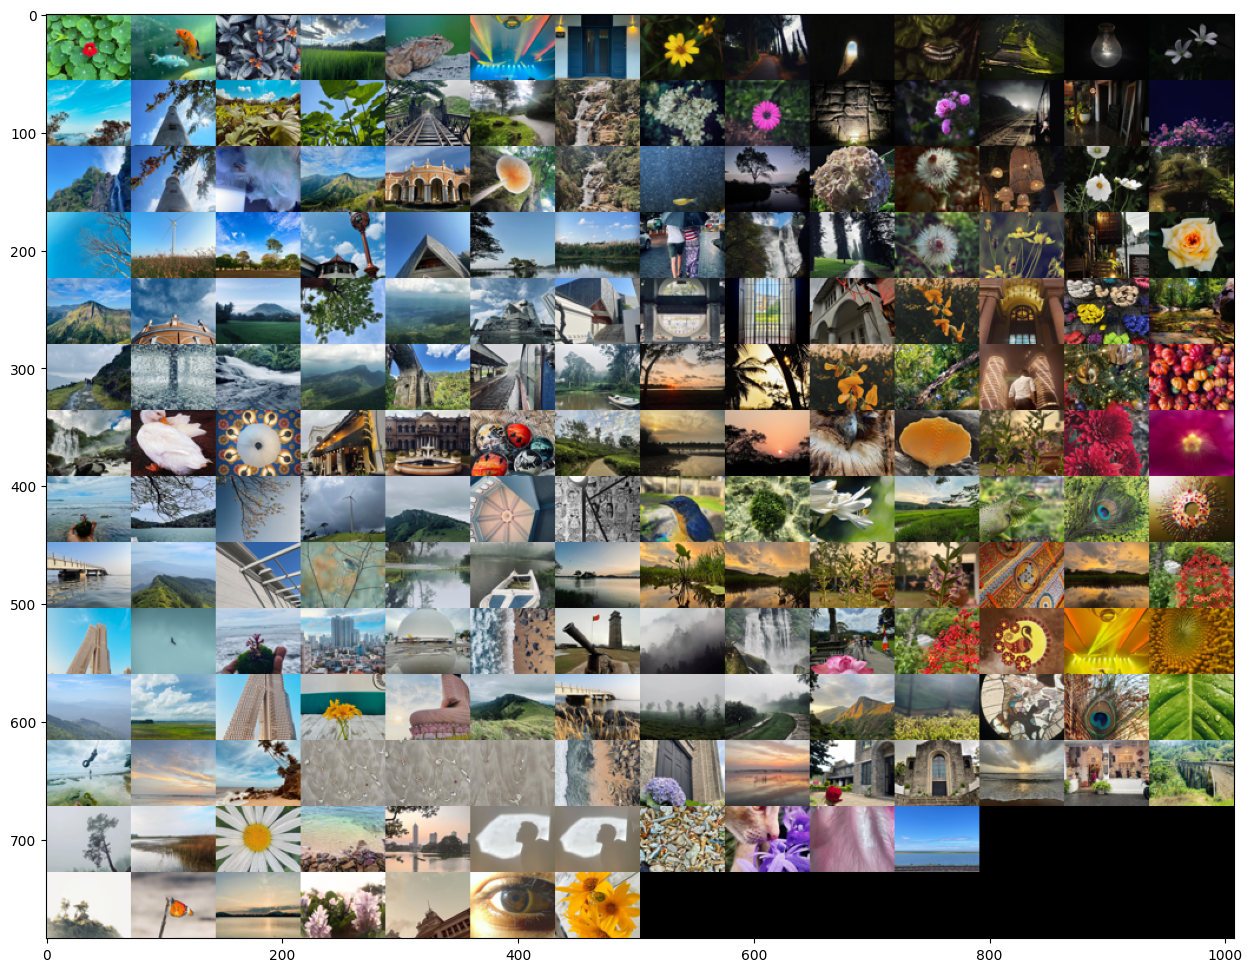

In [191]:
tile_width = 72
tile_height = 56

full_width = tile_width * nx
full_height = tile_height * ny
aspect_ratio = float(tile_width) / tile_height

grid_image = Image.new('RGB', (full_width, full_height))

for img, grid_pos in zip(images, grid_assignment[0]):
    idx_x, idx_y = grid_pos
    x, y = tile_width * idx_x, tile_height * idx_y
    tile = Image.open(img)
    tile_ar = float(tile.width) / tile.height  # center-crop the tile to match aspect_ratio
    if (tile_ar > aspect_ratio):
        margin = 0.5 * (tile.width - aspect_ratio * tile.height)
        tile = tile.crop((margin, 0, margin + aspect_ratio * tile.height, tile.height))
    else:
        margin = 0.5 * (tile.height - float(tile.width) / aspect_ratio)
        tile = tile.crop((0, margin, tile.width, margin + float(tile.width) / aspect_ratio))
    tile = tile.resize((tile_width, tile_height))
    grid_image.paste(tile, (int(x), int(y)))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(grid_image)

In [192]:
grid_image.save(f"{ig_id}__color_1_grid_14x14_t_sne.png")